## Import Libraries

In [9]:
%matplotlib inline

import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import LinearSVC
import pickle
from IPython.display import display
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from skimage import io

from scipy.ndimage.measurements import label
from scipy.ndimage.morphology import binary_dilation, grey_dilation

from util import *

## Reading images

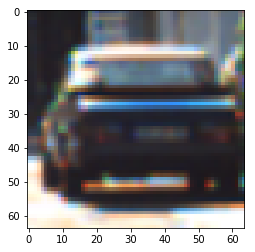

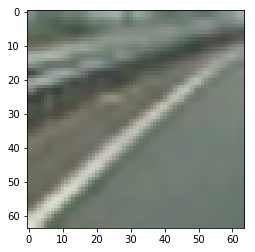

In [10]:
car_img = mpimg.imread('vehicle_detection_data/vehicles/KITTI_extracted/1.png')
non_car_img = mpimg.imread('vehicle_detection_data/non-vehicles/GTI/image13.png')

plt.imshow(car_img)
plt.show()
plt.imshow(non_car_img)
plt.show()

## Extracting HOG features 

...


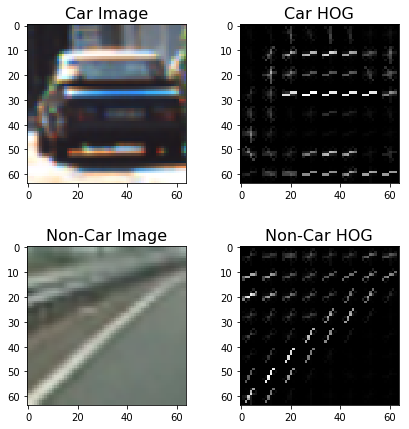

In [11]:
_, car_dst = get_hog_features(car_img[:,:,2], 9, 8, 8, vis=True, feature_vec=True)
_, non_car_dst = get_hog_features(non_car_img[:,:,2], 9, 8, 8, vis=True, feature_vec=True)

# Visualize 
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(7,7))
f.subplots_adjust(hspace = .4, wspace=.2)
ax1.imshow(car_img)
ax1.set_title('Car Image', fontsize=16)
ax2.imshow(car_dst, cmap='gray')
ax2.set_title('Car HOG', fontsize=16)
ax3.imshow(non_car_img)
ax3.set_title('Non-Car Image', fontsize=16)
ax4.imshow(non_car_dst, cmap='gray')
ax4.set_title('Non-Car HOG', fontsize=16)
print('...')

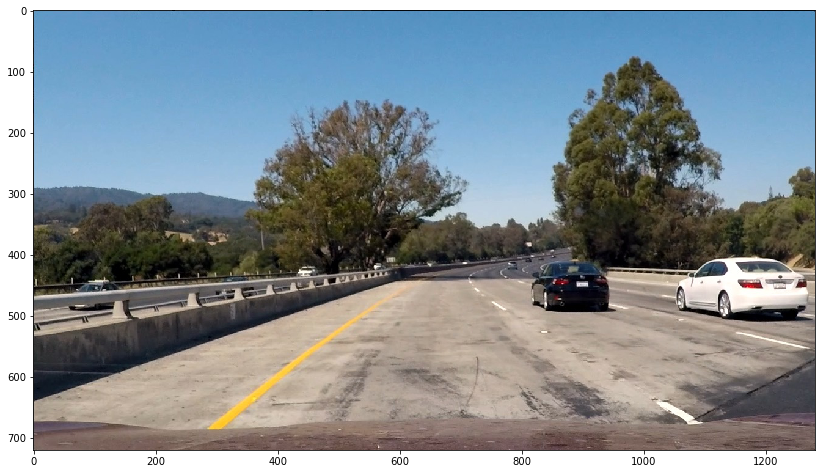

In [12]:
test_img = mpimg.imread('test_images/test1.jpg')
plt.figure(figsize=(14, 24))
plt.imshow(test_img)
plt.show()

## Search for vehicles in image using sliding video

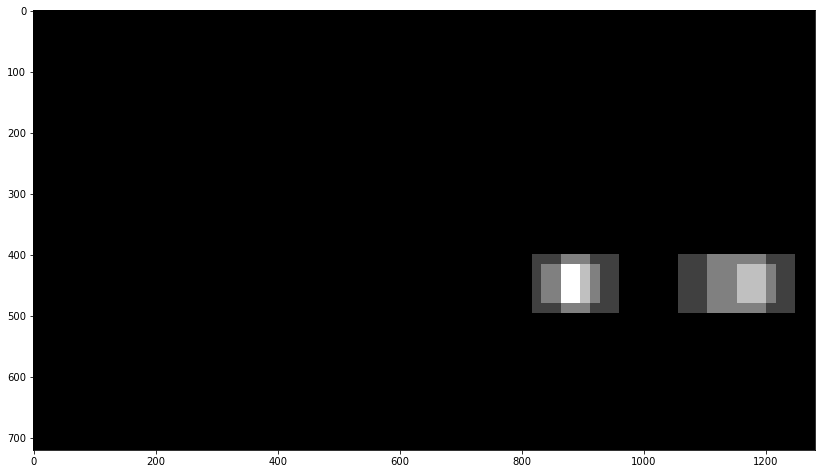

In [13]:
svc = pickle.load(open('trained_classifier.pkl', 'rb'))

# (ystart, yend, scale)
yranges = [(400, 464, 1.0), (416, 480, 1.0), (400, 496, 1.5), (432, 528, 2.0), 
            (400, 596, 3.5), (464, 660, 3.5)]

rectangles = []
for yrange in yranges:
    y_start = yrange[0]
    y_end = yrange[1]
    scale = yrange[2]
    rectangles.append(sliding_window_search(test_img, y_start, y_end, scale, svc)) 

rectangles = [item for sublist in rectangles for item in sublist] 
heatmap_img = np.zeros_like(test_img[:,:,0])

heatmap_img = add_heat(heatmap_img, rectangles)

plt.figure(figsize=(14, 24))
plt.imshow(heatmap_img, cmap='gray')
plt.show()

## Applying threshold to images

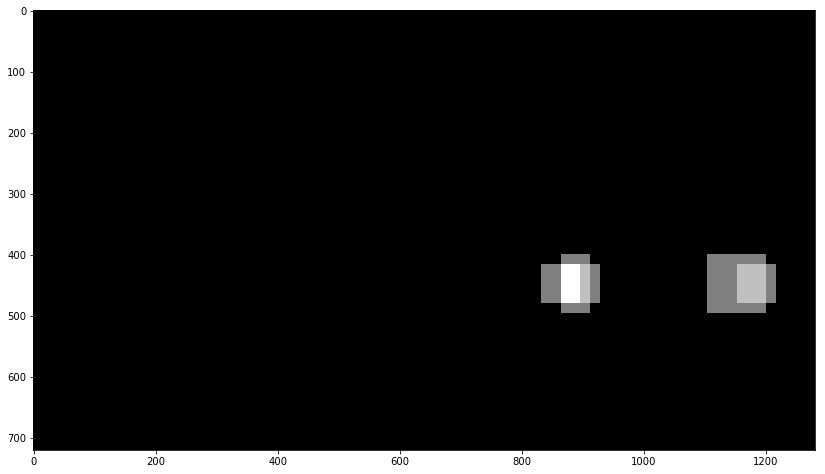

In [14]:
heatmap_img = apply_threshold(heatmap_img, 1)
plt.figure(figsize=(14, 24))
plt.imshow(heatmap_img, cmap='gray')
plt.show()

## Adding bounding boxes around vehicle images

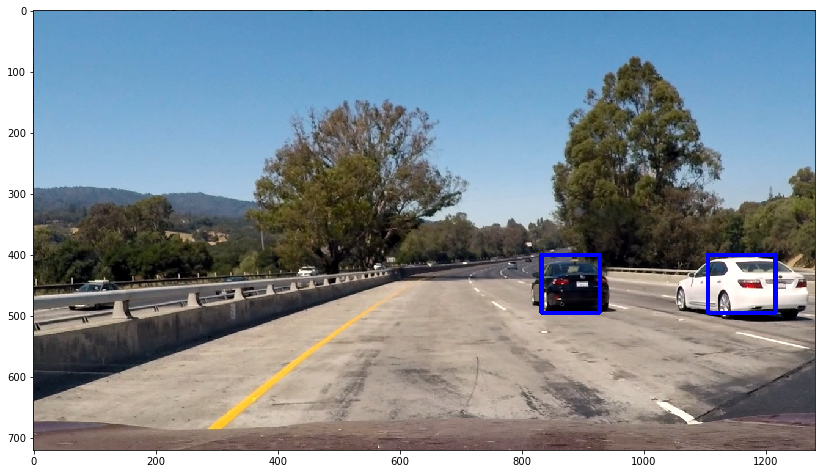

In [15]:
labels = label(heatmap_img)
draw_img, rects = draw_labeled_bboxes(np.copy(test_img), labels)

plt.figure(figsize=(14, 24))
plt.imshow(draw_img)
plt.show()

## Finding vehicle in project video

In [16]:
vehicles = Vehicles()

proj_out_file = 'output_project_video.mp4'
clip_proj = VideoFileClip('project_video.mp4')
clip_proj_out = clip_proj.fl_image(lambda img: pipeline(img, svc, vehicles))
%time clip_proj_out.write_videofile(proj_out_file, audio=False)

[MoviePy] >>>> Building video output_project_video.mp4
[MoviePy] Writing video output_project_video.mp4


100%|█████████▉| 1260/1261 [02:45<00:00,  7.56it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_project_video.mp4 

CPU times: user 9min 50s, sys: 1.3 s, total: 9min 51s
Wall time: 2min 45s
